In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("mpg.csv")

In [4]:
df.head()

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American


In [5]:
y = df.MPG
x = df.drop(columns=['MPG','Origin'])

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=df.Origin)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
stdsclr = StandardScaler()

In [19]:
x_scaled_train = stdsclr.fit_transform(xtrain)
x_scaled_test  = stdsclr.fit_transform(xtest)

In [20]:
xtrain.head()

,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year
38,8,351.0,153,4154,13.5,71
159,8,351.0,148,4657,13.5,75
48,4,88.0,76,2065,14.5,71
117,4,121.0,110,2660,14.0,73
12,8,360.0,215,4615,14.0,70


In [17]:
x_scaled_train[:5]

array([[ 1.47774215,  1.56230961,  1.33206253,  1.40234505, -0.80768017,
        -1.3344311 ],
       [ 1.47774215,  1.56230961,  1.19779784,  1.99812685, -0.80768017,
        -0.24946338],
       [-0.86272808, -1.0386042 , -0.7356137 , -1.07198533, -0.44182736,
        -1.3344311 ],
       [-0.86272808, -0.7122538 ,  0.1773862 , -0.3672335 , -0.62475376,
        -0.79194724],
       [ 1.47774215,  1.65131427,  2.99694468,  1.94837966, -0.62475376,
        -1.60567303]])

In [21]:
model = LinearRegression()

In [22]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.score(x,y)

0.8092552890383932

In [24]:
model.intercept_

-14.53525048050609

In [25]:
model.coef_

array([-3.29859089e-01,  7.67843024e-03, -3.91355574e-04, -6.79461791e-03,
        8.52732469e-02,  7.53367180e-01])

In [26]:
list(map(float,model.coef_))

[-0.32985908907395595,
 0.007678430243918999,
 -0.0003913555737607243,
 -0.006794617913375045,
 0.08527324694722971,
 0.753367179750102]

In [27]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

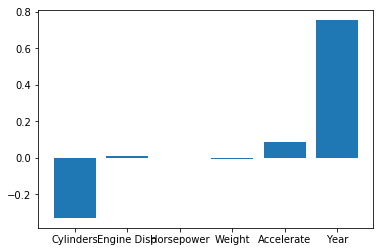

In [31]:
plt.bar(x.columns,model.coef_)

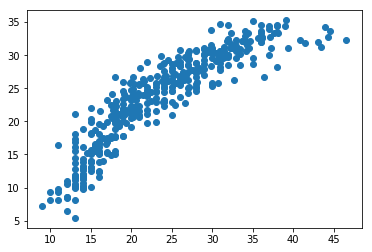

In [32]:
plt.scatter(y,model.predict(x))

In [33]:
print(mean_absolute_error(y,model.predict(x)))

2.6182640467289575


In [34]:
print(median_absolute_error(y,model.predict(x)))

2.2162948330013617


In [36]:
print(mean_squared_error(y,model.predict(x))**0.5)

3.4044340177796406


In [39]:
model.fit(x_scaled_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
model.score(x_scaled_train,ytrain)

0.819647986733614

In [42]:
print(mean_squared_error(ytrain,model.predict(x_scaled_train))**0.5)

3.2900539271432354


In [43]:
print(mean_squared_error(ytest,model.predict(x_scaled_test))**0.5)

3.739819998023756
